In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('AirPassengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['#Passengers'].min()

104

In [5]:
data['Dates']=pd.date_range(start='1949-01',end='1961-01',freq='M')

In [6]:
data.head()

,Month,#Passengers,Dates
0,1949-01,112,1949-01-31
1,1949-02,118,1949-02-28
2,1949-03,132,1949-03-31
3,1949-04,129,1949-04-30
4,1949-05,121,1949-05-31


In [7]:
pd.date_range(start='1949-01',end='1961-01',freq='M')

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [8]:
data=pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')

In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)

In [11]:
data['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [12]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


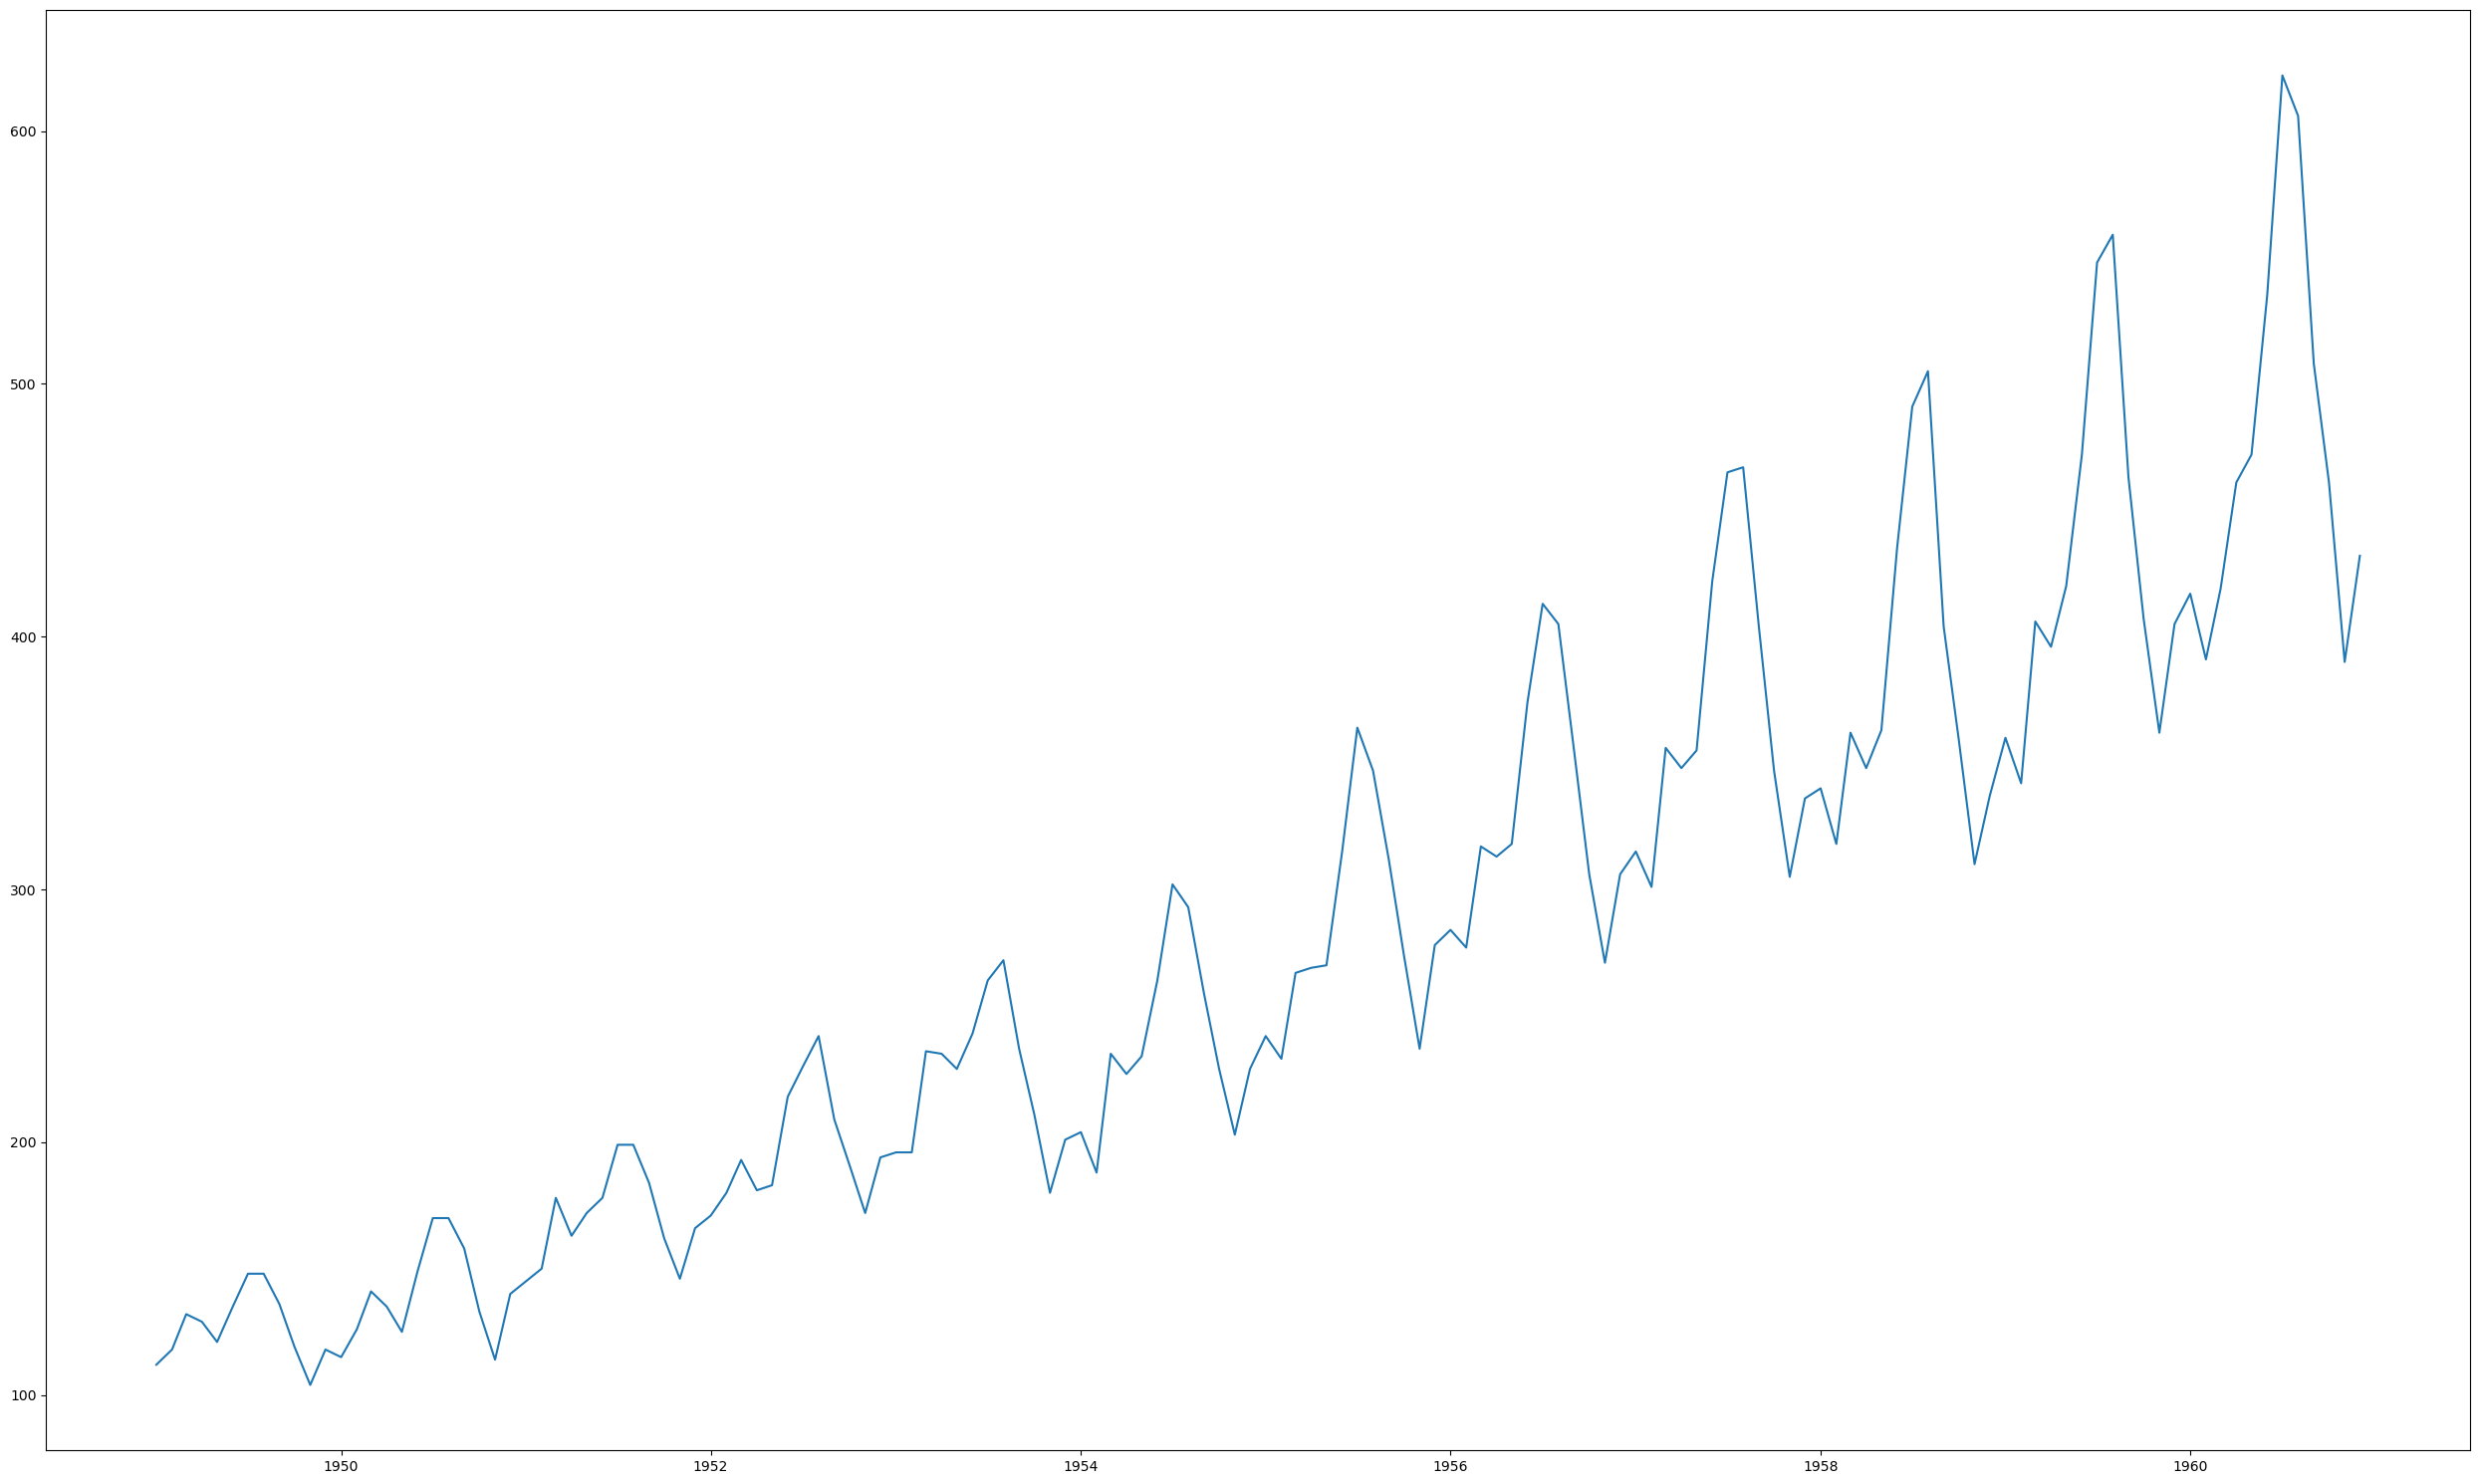

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot
plt.tight_layout()
## from plot we can see the series given is not stationary

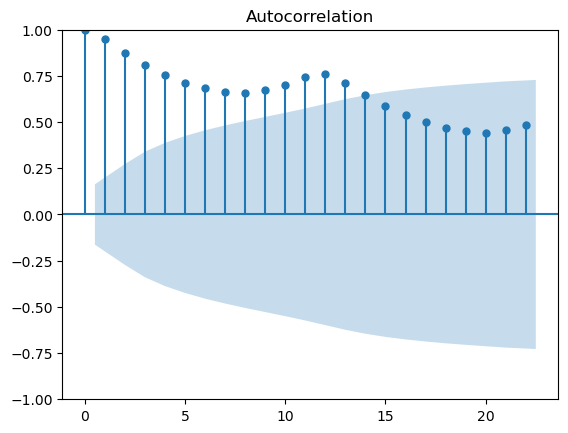

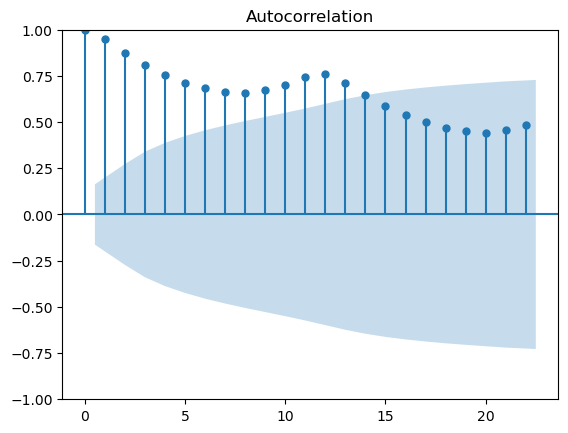

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_=plot_acf(data)
plot_

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
dftest=adfuller(data.Passengers,autolag='AIC')

In [17]:
dftest

(np.float64(0.815368879206051),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [18]:
data1=data.diff(periods=1)

In [19]:
data1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [20]:
data1=data1.iloc[1:]

In [21]:
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [22]:
dftest=adfuller(data1.Passengers,autolag='AIC')
dftest

(np.float64(-2.829266824169988),
 np.float64(0.05421329028382707),
 12,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.5069317854084))

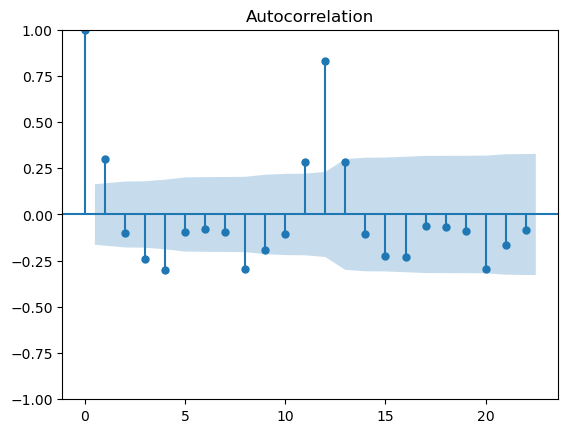

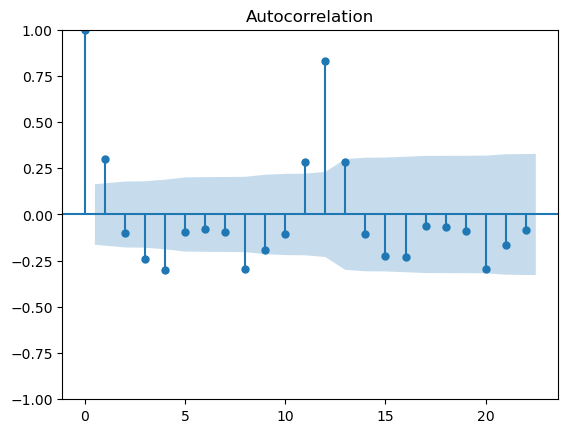

In [25]:
plot_acf(data1)

In [23]:
data2=data1.diff(periods=1)
data2

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [24]:
data2=data2.iloc[1:]

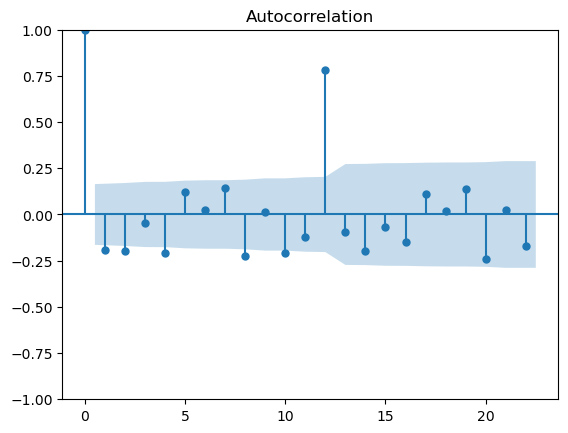

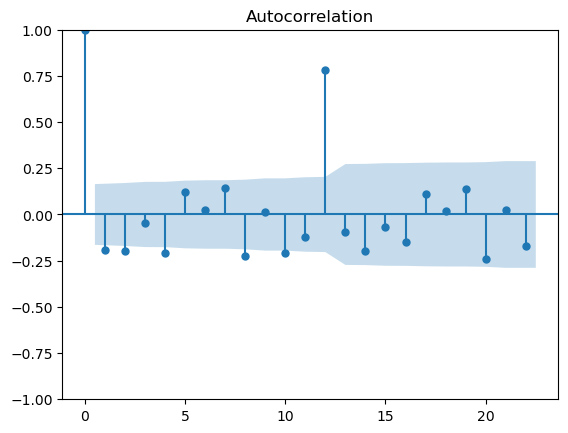

In [29]:
plot_acf(data2)

In [25]:
test2=adfuller(data2.Passengers,autolag='AIC')
test2

(np.float64(-16.384231542468537),
 np.float64(2.7328918500140445e-29),
 11,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(988.6020417275602))

In [26]:
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:]

In [32]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [27]:
from statsmodels.tsa.ar_model import AutoReg

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from statsmodels.tsa.ar_model import ar_select_order

In [30]:
mod=ar_select_order(data2,maxlag=15,glob=True)
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ar_model_fit=ar_model.fit()

In [32]:
predict=ar_model_fit.predict(start=100,end=142)
predict

1957-07-01   -26.325761
1957-08-01   -51.184110
1957-09-01   -43.959992
1957-10-01    -6.363909
1957-11-01    24.061033
1957-12-01    75.324375
1958-01-01   -30.525575
1958-02-01   -20.698153
1958-03-01    67.089284
1958-04-01   -56.564573
1958-05-01    13.377346
1958-06-01    66.337091
1958-07-01   -33.772981
1958-08-01   -58.228155
1958-09-01   -45.055018
1958-10-01   -14.690154
1958-11-01    35.370293
1958-12-01    80.696719
1959-01-01   -34.541873
1959-02-01   -19.600193
1959-03-01    67.142411
1959-04-01   -51.386197
1959-05-01    14.330762
1959-06-01    71.079740
1959-07-01   -41.567386
1959-08-01   -66.313619
1959-09-01   -47.008369
1959-10-01   -22.589679
1959-11-01    46.865050
1959-12-01    87.112502
1960-01-01   -38.965689
1960-02-01   -18.788673
1960-03-01    68.371352
1960-04-01   -46.488704
1960-05-01    17.168608
1960-06-01    74.840922
1960-07-01   -50.438749
1960-08-01   -75.197337
1960-09-01   -50.102526
1960-10-01   -29.954777
1960-11-01    58.602494
1960-12-01    94

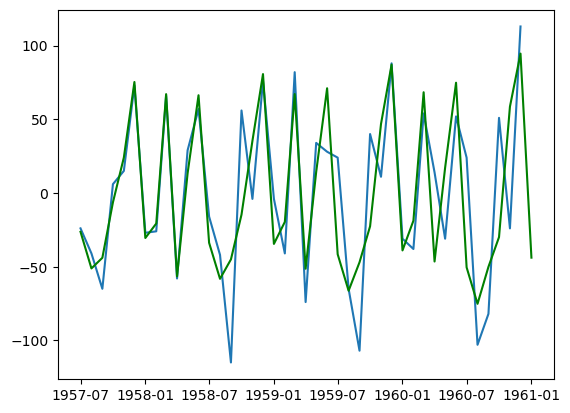

In [44]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(predict,color='green') 

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import itertools 

In [35]:
p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
best_aic=float('inf')
best_order=None
for order in pdq:
    try:
        model=ARIMA(train,order=order).fit()
        if model.aic<best_aic:
            best_aic=model.aic
            best_order=order
    except:
        continue
print(best_order)
print(best_aic)
        
        
            
        

(1, 0, 2)
919.8685366449453


In [36]:
model=ARIMA(train,order=(1, 0, 2))

In [37]:
len(test)

42

In [38]:
model_fit=model.fit()

In [39]:
print(model_fit.aic)

919.8685366449453


In [40]:
predict1=model_fit.forecast(steps=42)
predict1

1957-07-01   -53.006639
1957-08-01   -12.538116
1957-09-01     7.231620
1957-10-01    -4.033737
1957-11-01     2.385584
1957-12-01    -1.272327
1958-01-01     0.812054
1958-02-01    -0.375686
1958-03-01     0.301122
1958-04-01    -0.084542
1958-05-01     0.135220
1958-06-01     0.009993
1958-07-01     0.081351
1958-08-01     0.040690
1958-09-01     0.063860
1958-10-01     0.050657
1958-11-01     0.058180
1958-12-01     0.053893
1959-01-01     0.056336
1959-02-01     0.054944
1959-03-01     0.055737
1959-04-01     0.055285
1959-05-01     0.055543
1959-06-01     0.055396
1959-07-01     0.055480
1959-08-01     0.055432
1959-09-01     0.055459
1959-10-01     0.055444
1959-11-01     0.055453
1959-12-01     0.055447
1960-01-01     0.055450
1960-02-01     0.055449
1960-03-01     0.055450
1960-04-01     0.055449
1960-05-01     0.055449
1960-06-01     0.055449
1960-07-01     0.055449
1960-08-01     0.055449
1960-09-01     0.055449
1960-10-01     0.055449
1960-11-01     0.055449
1960-12-01     0

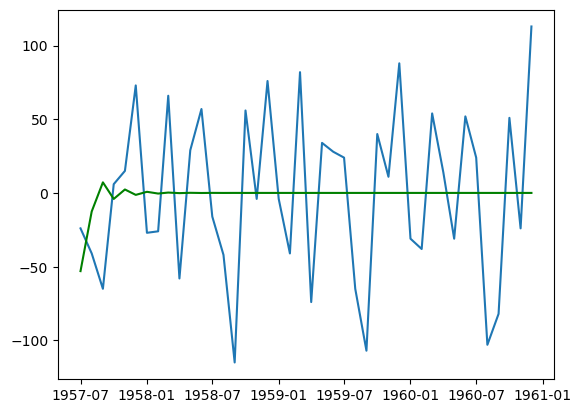

In [41]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(predict1,color='green') 

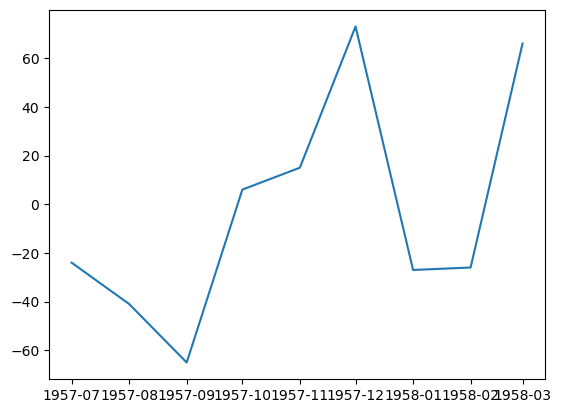

In [42]:
plt.plot(test[:9])

In [47]:
forecast25 = model_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

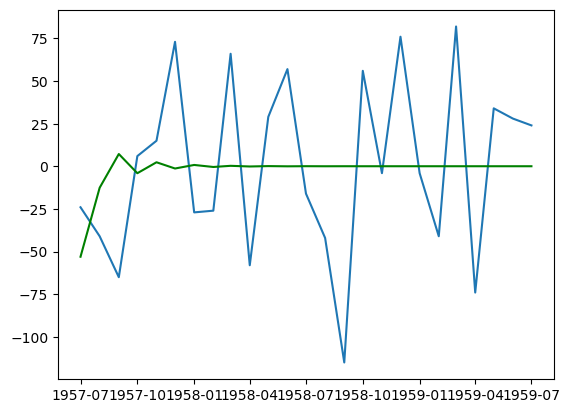

In [48]:
plt.plot(test[:25)
plt.plot(forecast25,color='green') 